In [1]:
#öncelikle datayı alıp analiz edelim. Bunun için ihtiyaç duyacağımız kütüphaneleri import edelim.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
data = pd.read_csv("marketing.csv")
datayedek = data.copy() #datamın yedeğini de aldım.
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [2]:
data.info() #görüldüğü üzere 9 tane kategorik değiken , 5 tane denumerik değişken var

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


Şimdi
yes/no kolonlarını da boolen türünde evet =1,hayır = 0 olarak kullanılcaktır.

## BENDEN İSTENEN SONUCU 1 veya 0 OLARAK RAPORLAYACAĞIM.

# Öznitellikler:

yaş: müşterinin yaşı (sayısal)

iş: iş türü (kategorik) =12değişken

medeni durum: medeni durum (kategorik) =3 değişken

eğitim (kategorik) =4 değişken

varsayılan: temerrüde düşen kredi var mı? (ikili)

bakiye: avro cinsinden ortalama yıllık bakiye (sayısal)

konut: konut kredisi var mı? (ikili)

kredi: kişisel kredi var mı? (ikili)

iletişim: iletişim iletişim türü (kategorik) 3 degişken

gün: ayın son iletişim günü (sayısal)

ay: yılın son iletişim ayı (kategorik) 11 değişen

süre: saniye cinsinden son temas süresi (sayısal)

kampanya: bu kampanya sırasında ve bu müşteri için gerçekleştirilen kişi sayısı (sayısal, son iletişimi içerir)

Çıktı (istenen hedef):

y - müşteri vadeli mevduata abone oldu mu? (ikili)



In [3]:
#Şimdi data da ki kategorik deşikenleri incleyelim.
kat_df = data.select_dtypes(include =["object"])

In [4]:
kat_df.head(10) 

,job,marital,education,default,housing,loan,contact,month,y
0,management,married,tertiary,no,yes,no,unknown,may,no
1,technician,single,secondary,no,yes,no,unknown,may,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,no
4,unknown,single,unknown,no,no,no,unknown,may,no
5,management,married,tertiary,no,yes,no,unknown,may,no
6,management,single,tertiary,no,yes,yes,unknown,may,no
7,entrepreneur,divorced,tertiary,yes,yes,no,unknown,may,no
8,retired,married,primary,no,yes,no,unknown,may,no
9,technician,single,secondary,no,yes,no,unknown,may,no


In [5]:
kat_df["job"].value_counts().count() #KATEGORİK DEĞİŞKEN OLAN JOP toplam da 12 deişkeni var. diğerlerini de bulup notlar kısmına yazdm

12

In [6]:
kat_df["job"].value_counts() #burası meslek değikenin frekansı.Dğer değişkenlerin de fraknsına baktık.
#unknown olanalara sonra çözüm bulacağım.

blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64

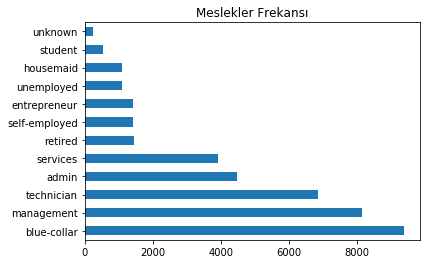

In [7]:
(kat_df["job"]
 .value_counts()
 .plot.barh()
 .set_title("Meslekler Frekansı")); #Diğer kategorik değşkenleri de bu şekilde görselleştirebilriz.

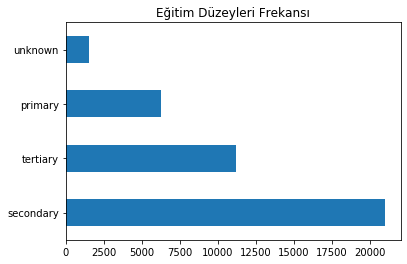

In [8]:
kat_df["education"].value_counts().plot.barh().set_title("Eğitim Düzeyleri Frekansı");

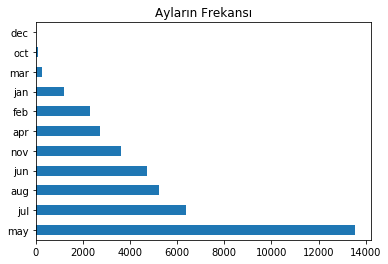

In [9]:
kat_df["month"].value_counts().plot.barh().set_title("Ayların Frekansı");

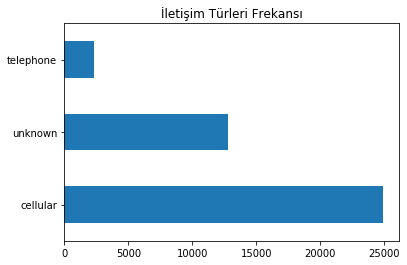

In [10]:
(kat_df["contact"]
 .value_counts()
 .plot.barh()
 .set_title("İletişim Türleri Frekansı"));

<Figure size 216x576 with 0 Axes>

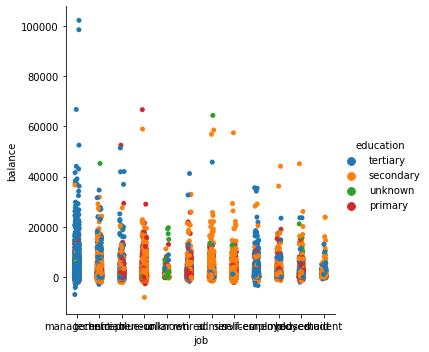

In [12]:
plt.figure(figsize=(3,20),)
sbn.catplot(x="job",y="balance",hue ="education",data = data); 
#Burada meslek grublarına karşı hesap bakiyerini görmek istedim.
#Ayrıca eğitim seviyelerinin de etkisi meslek grupları ile grublayıp bakiyelerin derinliği görmüş oldum.

Mesela burada yöetici olanların hesaplarında daha çok bakiye olduğunu görebiliyoruz. Tabi ki diğer mesleklerde de bu yogunluk göze çarpmaktadır.Ayrıca eğitim seviyerlerinin de bakiyeleri nasıl etkilediğini yorumlayabilriz.